# How To Read and Plot a Data File

In this example we will see how to open a text file containing some data we want to plot

In [1]:
import numpy as np

We fake some data by using a random number generator, come fossero delle misure di lab

In [2]:
x = np.random.uniform(0.0,3.0,100)   #ho generato degli no array di numeri casuali appositamente per l'esempio
y = np.random.uniform(10.0,100.0,100) #random.uniform-> random è per la casualità e uniform è la 
#distribuzione uniforme : tutti i 100 numeri tra 0 e 3 hanno la stessa prob di uscire

In [3]:
print(x)

[0.08305512 1.76814682 2.47580514 1.56254315 1.10138803 0.38355882
 0.20252234 2.95252834 2.57257702 0.92559364 2.43250059 1.42755877
 0.21722365 2.08953206 1.842821   0.83694665 0.46080287 2.79805318
 0.65285684 1.44208516 2.26072221 2.98382099 0.31327137 2.44272515
 2.41967462 1.35459094 1.99856341 2.27742968 0.85563792 0.19207024
 0.75550865 1.27011401 0.32284348 1.33068952 2.32231702 1.57112161
 0.96998818 2.49387895 1.24221792 0.04318042 1.21278755 1.02972871
 1.19080373 0.36948775 2.16032973 1.88531606 2.34898615 2.45358915
 2.79435919 1.27951008 1.96350342 0.01929146 2.03533647 2.72724536
 2.34217757 1.24906097 0.11893907 2.85604399 0.66105492 0.68847353
 1.80379997 2.5527919  1.52528077 2.4980676  2.47011928 0.66014437
 1.42407604 0.89326126 1.12554864 2.54381436 2.35108532 1.30804884
 2.57987335 0.73822055 0.95326001 2.44886159 0.26372689 2.41219481
 0.65706212 0.75609672 0.88113798 0.76588042 1.53528967 1.38141299
 2.24443762 2.88085551 2.08459724 2.29150501 1.24612345 0.2931

We now add a column with sequential number to fake the day the data was taken for example

## Creazione della TABELLA con i dati:

In [4]:
#come salviamo i dati di x e y in una bella TABELLA ?

z=np.linspace(1,100,100) #array con valori (100) distribuiti in maniera lineare tra uno e 100: utile per salvare il gg in cui ho fatto misura ecc
xx=np.c_[z, x, y] #CREA UNA MATRICE(una TABELLA) IN CUI METTE LE COLONNE UNA A FIANCO ALL'ALTRA NELL'ORDINE SCRITTO
#il comando è np.c_  ...la c sta per colonna: c'è anche con la r per aggiugnere righe al vettore

In [5]:
#print the first 10 rows
print(xx[:10,:])   #gli dico di stampare le prima 10 righe della MATRICE xx. con : intendo tutte. con :10 significa dalla prima alla 10 riga
print('\n')
# and the last 10 rows
print(xx[-10:,:])

[[1.00000000e+00 8.30551225e-02 8.38564572e+01]
 [2.00000000e+00 1.76814682e+00 4.44108464e+01]
 [3.00000000e+00 2.47580514e+00 9.18105438e+01]
 [4.00000000e+00 1.56254315e+00 6.87346406e+01]
 [5.00000000e+00 1.10138803e+00 3.08158630e+01]
 [6.00000000e+00 3.83558819e-01 6.81086689e+01]
 [7.00000000e+00 2.02522341e-01 7.16166869e+01]
 [8.00000000e+00 2.95252834e+00 2.15505493e+01]
 [9.00000000e+00 2.57257702e+00 2.54917878e+01]
 [1.00000000e+01 9.25593636e-01 3.66256578e+01]]


[[ 91.           0.29407574  62.18721281]
 [ 92.           0.88844841  18.67202474]
 [ 93.           1.86823385  37.74270026]
 [ 94.           1.18698498  46.07187909]
 [ 95.           0.76216588  80.32725265]
 [ 96.           0.85986981  63.75143964]
 [ 97.           0.92378861  54.2476958 ]
 [ 98.           2.76424859  18.43274784]
 [ 99.           0.84901925  41.46510235]
 [100.           2.24563123  85.98545719]]


In [6]:
# We save the table in a human-readable format // SALAVARE IN UN FILE DI TESTO
np.savetxt('./fake_data.txt',xx,
           header='giorno \t | temp \t | press', 
           comments='# fake data\n# generated by me\n',
           delimiter='\t|',
           fmt='%1.3f')   #con np.savetxt salvo la tabella in un FILE DI TESTO. mi dice dove salvarla, poi cosa vogliamo
       #salvare cioe la matrice xx, header aggiunge in cima al file la data gg ecc uno per colonna
      #colonna e poi con i commenti (...), delimiter: gli spazi di tablatura e la riga verticale | tra i vari numeri,
      #fmt per troncare i float dei dati 1.3 3 sono i digit number dopo la virgola
    
    #una volta eseguito il comando il file lo trovo nel jupyter notebook.

## Read the Data File

In [7]:
# load the data table. IMPORTARE UN FILE DI TESTO !
data = np.genfromtxt('./fake_data.txt',   #uso la funzione np.genfromtxt. siccome il file si trova nella stessa directory mi basta ./ altrimenti aggiungere ...
                     delimiter="|",  #per escludere la linea nel file di testo, mi servono solo i dati grezzi
                     skip_header=2,  #voglio ignorare le righe di commento, aprire il txt e vedere quante sono, poi escludi quelle righe
                     names=True)  #i nomi delle colonne dei dati invece li voglio

print('Column names and dtypes: ', data.dtype)  #per il tipo di dato
print('Data array shape: ',data.shape)         #la lunghezza dell'oggetto data

Column names and dtypes:  [('giorno', '<f8'), ('temp', '<f8'), ('press', '<f8')]
Data array shape:  (100,)


In [10]:
print(data['temp'])    #mi stampa la colonna temp (la colonna con le temperature)

[0.083 1.768 2.476 1.563 1.101 0.384 0.203 2.953 2.573 0.926 2.433 1.428
 0.217 2.09  1.843 0.837 0.461 2.798 0.653 1.442 2.261 2.984 0.313 2.443
 2.42  1.355 1.999 2.277 0.856 0.192 0.756 1.27  0.323 1.331 2.322 1.571
 0.97  2.494 1.242 0.043 1.213 1.03  1.191 0.369 2.16  1.885 2.349 2.454
 2.794 1.28  1.964 0.019 2.035 2.727 2.342 1.249 0.119 2.856 0.661 0.688
 1.804 2.553 1.525 2.498 2.47  0.66  1.424 0.893 1.126 2.544 2.351 1.308
 2.58  0.738 0.953 2.449 0.264 2.412 0.657 0.756 0.881 0.766 1.535 1.381
 2.244 2.881 2.085 2.292 1.246 0.293 0.294 0.888 1.868 1.187 0.762 0.86
 0.924 2.764 0.849 2.246]


## Produce Some Plots

In [11]:
import matplotlib.pyplot as plt    #ricorda di caricare la libreria per i plot 
plt.rcParams['font.size'] = 16    #font del grafico

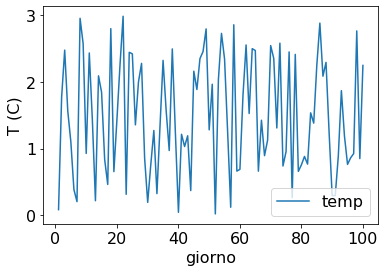

In [12]:
plt.plot(data['giorno'], data['temp'], label='temp') #sull'asse delle x ho il giorno, sulle y la temperatura
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Another Way to Read a Table : un altro modo per leggere una tabella di dati

This method is useful expecially for very large tables and to better control formatting.
**Quanto visto prima è più che sufficiente per leggere i dati.**

In [13]:
import pandas   #libreria pandas: utile se ho molti dati da importare su tabelle grandi

data2 = pandas.read_csv('./fake_data.txt',   #pandas.read_csv
                        sep='|',             #troviamo le varie opzioni: sep è il separatore, le righe con il # davanti vengono ignorate
                        comment='#',
                        header=0)             #header=0, i nomi dei dati si trovano nella prima riga che nn è un commento

In [14]:
data2 #show the table

,giorno \t,temp \t,press
0,1.0,0.083,83.856
1,2.0,1.768,44.411
2,3.0,2.476,91.811
3,4.0,1.563,68.735
4,5.0,1.101,30.816
...,...,...,...
95,96.0,0.860,63.751
96,97.0,0.924,54.248
97,98.0,2.764,18.433
98,99.0,0.849,41.465


In [15]:
print(data2.columns) #purtroppo include anche il carattere di tablatura. sotto viene mostrato come eliminarlo

Index(['giorno \t ', ' temp \t ', ' press'], dtype='object')


Let's clean the header by removing the tab in the name of the columns since we don't like it.

In [16]:
data2.columns = data2.columns.str.strip() #str.strip() elimina spazi e tab
print(data2.columns)

Index(['giorno', 'temp', 'press'], dtype='object')


In [17]:
data2

,giorno,temp,press
0,1.0,0.083,83.856
1,2.0,1.768,44.411
2,3.0,2.476,91.811
3,4.0,1.563,68.735
4,5.0,1.101,30.816
...,...,...,...
95,96.0,0.860,63.751
96,97.0,0.924,54.248
97,98.0,2.764,18.433
98,99.0,0.849,41.465


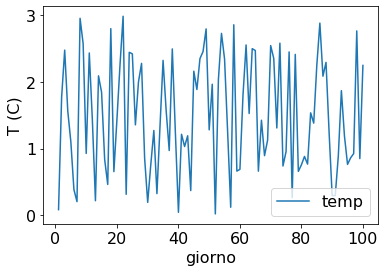

In [18]:
plt.plot(data2['giorno'], data2['temp'], label='temp')   #l'implementazione per il grafico è la stessa di prima.
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Esempio pratico con dati da laboratorio di astrofisica

In questo caso il file di testo contiene 150 blocchi di dati scritti consecutivamente e, per ogni blocco, i primi tre valori si riferiscono al campionamento con cui i dati sono stati presi.

In [19]:
data3 = np.loadtxt('./prova1.txt', delimiter=';') #i dati sono separati da dei ;  in qst caso

In [22]:
print(data3.shape) #notiamo che sono 150 blocchi (150 righe con 8195 valori)

(150, 8195)


In [23]:
print(data3[0,:])  #primo blocco (0) tutti i valori (:). i puntini ... chiaramente separano i primi 3 dagli ultimi 3

[ 2.161000e+03  2.240000e+09  1.953125e+04 ... -9.140900e+01 -9.066600e+01
 -8.899700e+01]


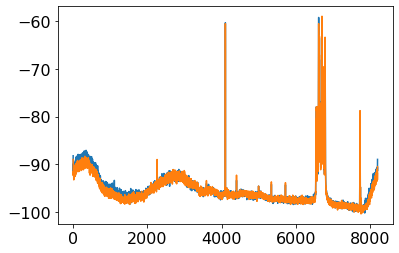

In [25]:
plt.plot(data3[0,3:]) #plotto l'andamento del primo blocco, senza le prime tre colonne che erano da scartere
plt.plot(data3[1,3:]) #plotto il secondo blocco, in arancione.

Adesso vogliamo generare l'asse delle x sapendo che `data3[0,1]` indica la frequenza iniziale e `data3[0,2]` indica la frequenza di campionamento.

In [40]:
aa = np.arange(data3[0,1],data3[0,1]+data3[0,2]*(len(data3[0,3:])), data3[0,2])
#creo un array con arange che va dal primo numero che è la freq. iniziale fino a quella finale (...)
#data3[0,2] è il passo
#len è la lunghezza dell'array ( in questo caso del primo blocco da 3 all'ultimo valore)

Adesso controlliamo che il vettore che abbiamo prodotto abbia infatti la giusta lunghezza ed i giusti valori

In [41]:
print(aa.shape)
print(aa)

(8192,)
[2.24000000e+09 2.24001953e+09 2.24003906e+09 ... 2.39994141e+09
 2.39996094e+09 2.39998047e+09]


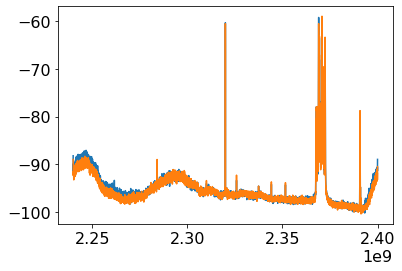

In [42]:
plt.plot(aa, data3[0,3:])
plt.plot(aa, data3[1,3:]) #assumo che l'asse delle x sia lo stesso del plot sopra